In [1]:
# Check logits



In [2]:
import h5py
import os

# Path to your HDF5 file
save_path = '/network/scratch/s/sonia.joseph/imagenet_logits'


# Open the HDF5 file
with h5py.File(os.path.join(save_path, 'logits_and_labels.h5'), 'r') as h5f:
    # Load the logits dataset
    logits_dataset = h5f['logits']
    labels = h5f['labels']

    # Inspect the first few logits
    print("Sample logits:")
    print(logits_dataset[:5])  # Adjust this to print as many logits as you want
    print()
    
    print("Sample labels:")
    print(labels[:5])
    print(labels.shape)
    print()
    
    # Optionally, check the shape of the logits dataset
    print("Shape of logits dataset:", logits_dataset.shape)


Sample logits:
[[ 1.3197558   0.64028597 -2.5946164  ...  2.0166576   8.1317215
   1.7427127 ]
 [ 0.0099133   0.6190106  -2.2501967  ... -1.4064566   1.3788366
  -0.5324473 ]
 [-2.1194263   1.9188865  -1.8948439  ...  0.7939403   3.626832
   9.445016  ]
 [-2.2360492  -0.4828815  -1.3884926  ... -2.4632864  -0.34940636
   3.0908036 ]
 [-2.6550264  -1.1927806  -0.36545697 ... -1.8845404   1.9736675
   1.7206402 ]]

Sample labels:
[939 206 728 454 566]
(50000,)

Shape of logits dataset: (50000, 1000)


In [3]:
logits_dataset

<Closed HDF5 dataset>

452


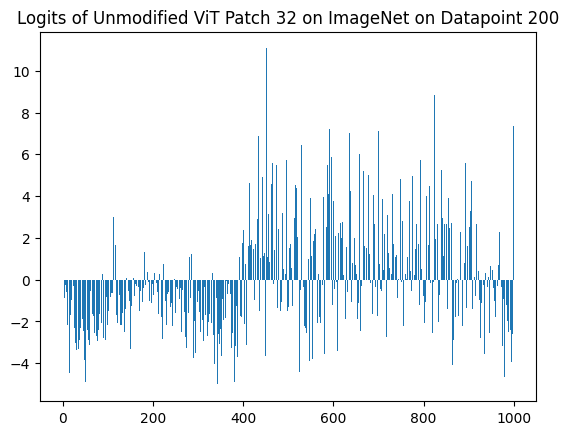

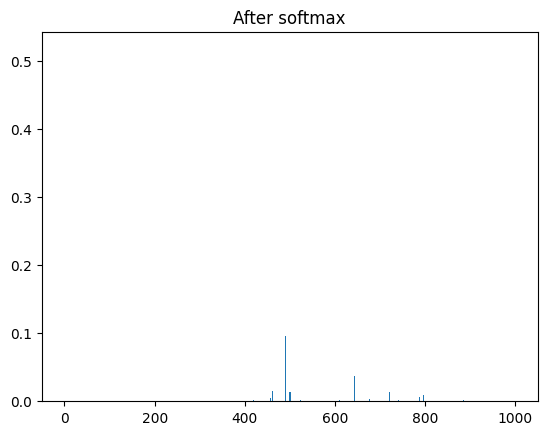

In [36]:
import matplotlib.pyplot as plt

import numpy as np

def softmax_fn(x):
    # Apply softmax to an array (can be a vector or a matrix)
    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x, axis=0)

# Open the HDF5 file
with h5py.File(os.path.join(save_path, 'logits_and_labels.h5'), 'r') as h5f:
    # Load the logits dataset
    logits_dataset = h5f['logits']
    labels = h5f['labels']
    
    idx = 200
    print(labels[idx])
        
    plt.figure()
    plt.bar(range(1000),logits_dataset[idx,:])
    plt.title(f"Logits of Unmodified ViT Patch 32 on ImageNet on Datapoint {idx}")
    
    softmax_data = softmax_fn(logits_dataset[idx,:])
    plt.figure()
    plt.bar(range(1000), softmax_data)
    plt.title(f'After softmax')